# protostars
## 05- Solid angle ratio
### II. Compute the solid angle ratio

Let's just look at the solid angle and stellar properties.

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp2/output/veil1/run02/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]

In [4]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [5]:
_ =[print(i, lab) for i, lab in enumerate(label)]

0 $T_{\mathrm{eff}}$
1 $\log{g}$
2 $[\mathrm{Fe}/\mathrm{H}]$
3 $v_z$
4 $v\sin{i}$
5 $\log{\Omega}$
6 $T_{\mathrm{BB}}$
7 $\log{\Omega_2}$
8 $c^1$
9 $c^2$
10 $c^3$
11 sigAmp
12 logAmp
13 $l$


In [6]:
gi = [0,1,5,7]
n_dim = len(gi)
burned = burned[:,:,gi]
labs = np.array(label)[gi]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

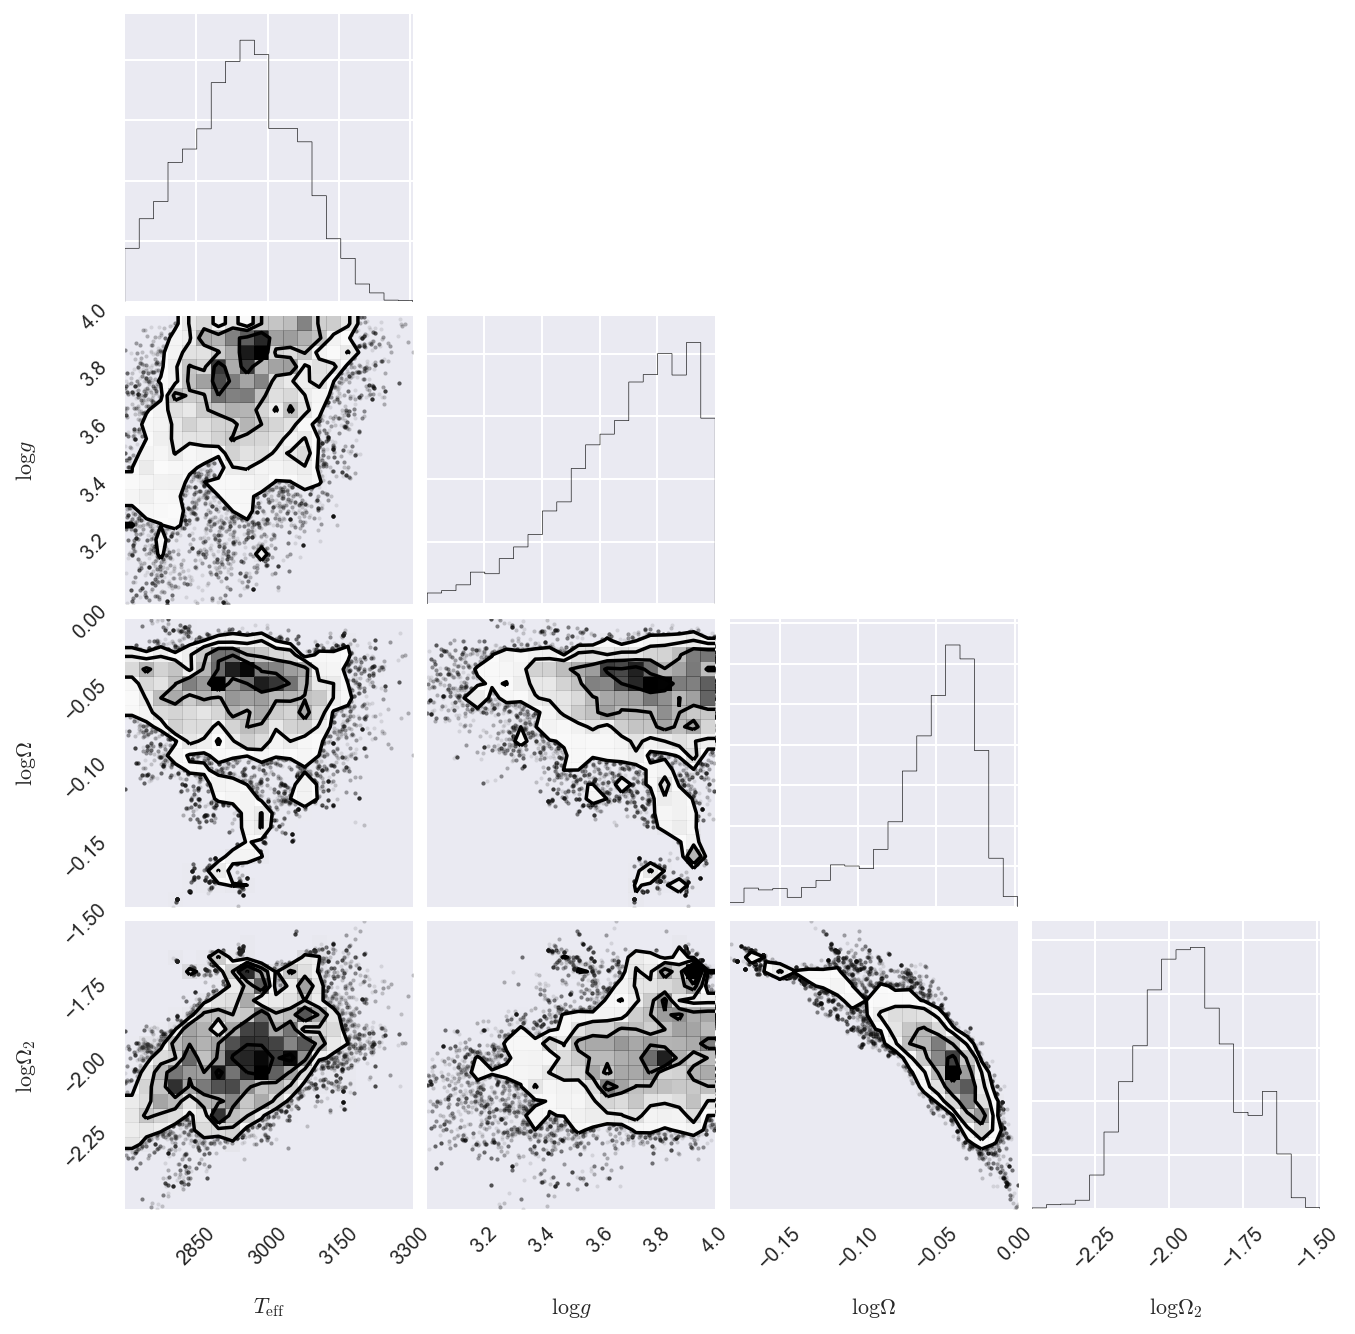

In [7]:
import corner
fig = corner.corner(fc, labels=labs)
fig.savefig('../plots/Exp2Run02_physics.png', dpi=300)

## $\Omega$ ratio

$\Omega_1 = 10^{\log{\Omega_1}}$ <-- star solid angle  
$\Omega_2 = 10^{\log{\Omega_2}}$ <-- disk solid angle

$k_\Omega \equiv \frac{\Omega_2}{\Omega_1}$  <-- Ratio of areas subtended by disk and star

In [8]:
_ =[print(i, lab) for i, lab in enumerate(labs)]

0 $T_{\mathrm{eff}}$
1 $\log{g}$
2 $\log{\Omega}$
3 $\log{\Omega_2}$


In [9]:
fc.shape

(40000, 4)

In [10]:
k_omega = 10.0**fc[:, 3]/(10.0**fc[:,2])

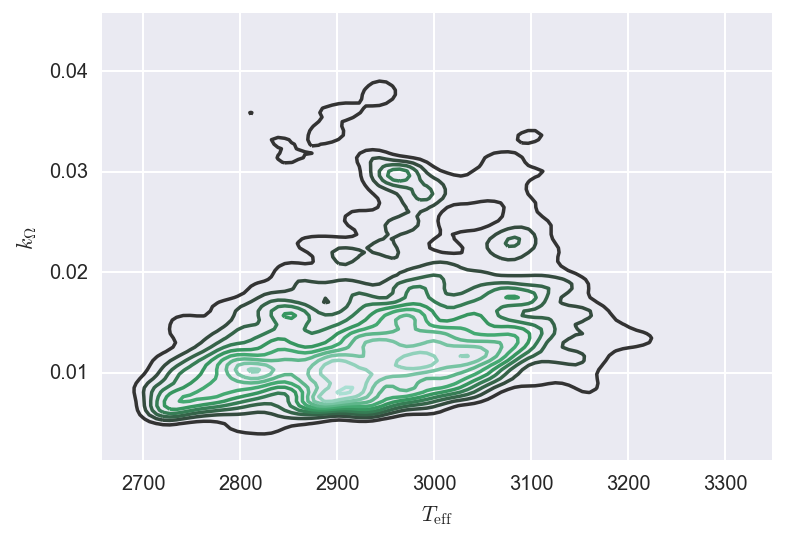

In [11]:
sns.kdeplot(fc[:, 0], k_omega)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$k_\Omega$")

Strange.  So we'd predict that the solid angle of the disk should be much larger than the solid angle of the star:  

$k_\Omega > 1$  

...given that the disk is cooler than the star.

But instead we find:

$k_\Omega \sim 0.01$

This value is **probably erroneous** related to issues in the units assumed in AstroPy's Black Body and the Phoenix model grid.  
I anticipated this discrepancy in [Issue #5](https://github.com/BrownDwarf/protostars/issues/5).